In [52]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import category_encoders as ce
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('Data/train.csv')
train_df = train_df.drop(['PassengerId'], axis=1)

In [3]:
print(train_df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [6]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vande Walle, Mr. Nestor Cyriel",male,347082,B96 B98,S
freq,1,577,7,4,644


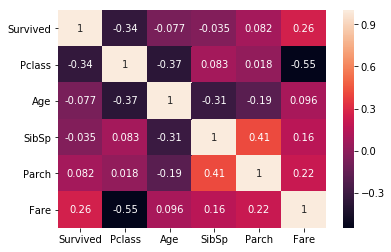

In [8]:
sns.heatmap(train_df.corr(), annot=True)

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


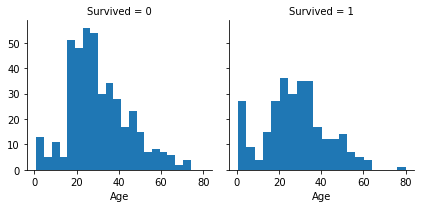

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

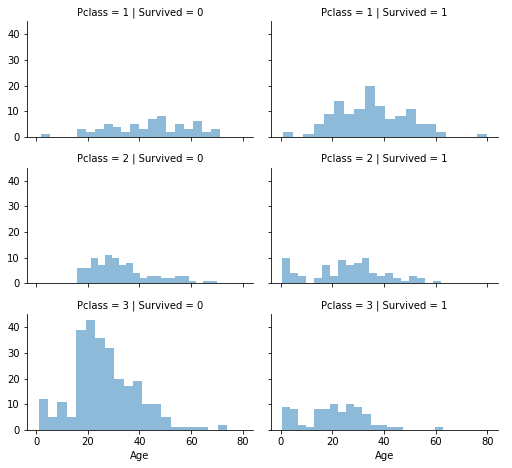

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/hakunamatata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hakunamatata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


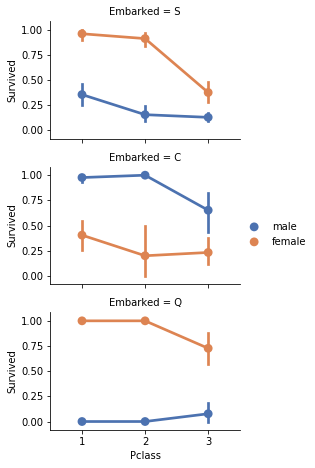

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

In [16]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)

In [17]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                                 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
train_df = train_df.drop(['Name'], axis=1)

In [21]:
Y = train_df['Survived'].values

In [22]:
train_df = train_df.drop(['Survived'], axis=1)

In [23]:
train_categorical = train_df.select_dtypes(include=['O'])

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [25]:
age_mean = np.mean(train_df['Age'])
train_df['Age'] = train_df[['Age']].fillna(age_mean)
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB
None


In [26]:
train_df = train_df.fillna('missing')

In [28]:
categoricals = list(train_df.select_dtypes(include=['O']).columns) + ['Pclass']

In [29]:
encoder = OneHotEncoder(sparse=False)

In [30]:
encoded = encoder.fit_transform(train_df[categoricals])

In [31]:
train_ohe = pd.DataFrame(encoded, columns=np.hstack(encoder.categories_))

In [32]:
train_df = pd.concat((train_df, train_ohe), axis=1).drop(categoricals, axis=1)

In [33]:
X = train_df.values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [70]:
model = DecisionTreeClassifier()

In [71]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
pred = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, roc_curve, auc

In [74]:
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, pred, average='macro')

Accuracy: 0.7541899441340782
Precision: 0.7461166284695697
Recall: 0.7498061514603257
Fscore: 0.7475641025641026


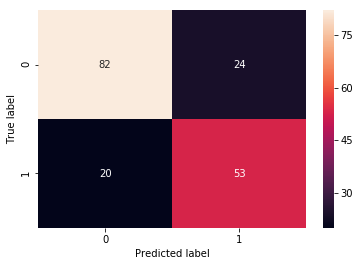

In [75]:
print('Accuracy: {}\nPrecision: {}\nRecall: {}\nFscore: {}'.format(
        acc, precision, recall, fscore))
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

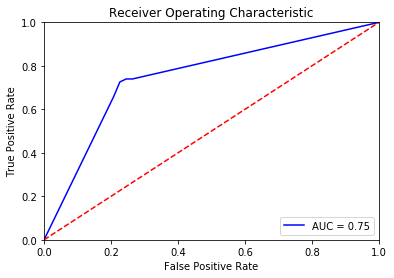

In [76]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.8212290502793296
Precision: 0.814551282051282
Recall: 0.8170715947273197
Fscore: 0.8157014157014157


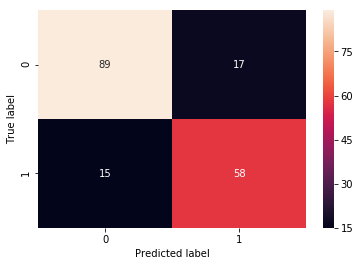

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, pred, average='macro')

print('Accuracy: {}\nPrecision: {}\nRecall: {}\nFscore: {}'.format(
        acc, precision, recall, fscore))
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

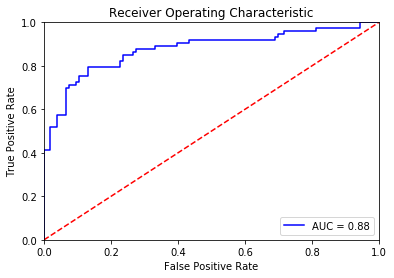

In [69]:
probs = model.predict(X_test)
preds = probs
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()